# HSE 2023: Введение в машинное обучение БИ 22/23

## Домашнее задание № 4


# Внимание!

* Некоторые задания требуют значительного времени для выполнения, поэтому **лучше приступить к выполнению домашнего задания как можно раньше**

* Решения обязательно должны содержать комментарии, все полученные результаты должны сопровождаться выводами (для этого удобно использовать ячейки markdown)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = (11, 5)
%matplotlib inline

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Часть 1. Дерево решений

### Задание 1  (1 балл)

Загрузите датасет boston и разделите его на тренировочную ($75\%$) и тестовую ($25\%$) части. Обучите дерево глубины 1 и постройте следующий график:

- Scatter plot для точек обучающей выборки (Выбранный моделью признак по оси x, целевая переменая по оси y)
- Обученная модель

In [ ]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
""";

In [ ]:
# ссылка на гугл диск с файликом boston.csv https://drive.google.com/file/d/1NA8FLxIOCbI7xQCuXnCTDOkBYMAGw4RS/view?usp=sharing
!gdown 1NA8FLxIOCbI7xQCuXnCTDOkBYMAGw4RS

colnames=['crim', 'an', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptrratio', 'b', 'lstat', 'medv' ]
data = pd.read_csv("/content/boston.csv", header=None, names=colnames, delim_whitespace=True)
data.head(2)

Downloading...
From: https://drive.google.com/uc?id=1NA8FLxIOCbI7xQCuXnCTDOkBYMAGw4RS
To: /content/boston.csv
100% 49.1k/49.1k [00:00<00:00, 107MB/s]


,crim,an,indus,chas,nox,rm,age,dis,rad,tax,ptrratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [ ]:
y = data.medv
X = data.drop(['medv'], axis=1)
columns = data.drop(['medv'], axis=1).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

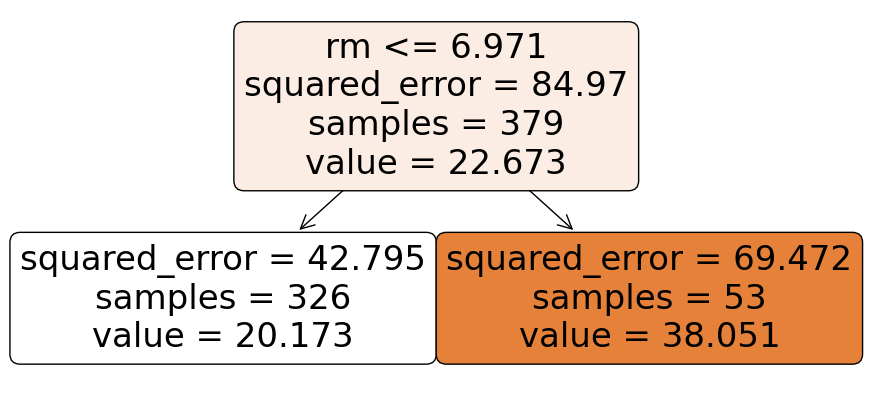

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeRegressor(max_depth=1, random_state=13)
dt.fit(X_train, y_train)

plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

y_pred_dt = dt.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_dt)

47.42661220616193

In [ ]:
#как мы видим на картинке выше, модель выбрала параметр rm, поэтому визуализация будет по нему

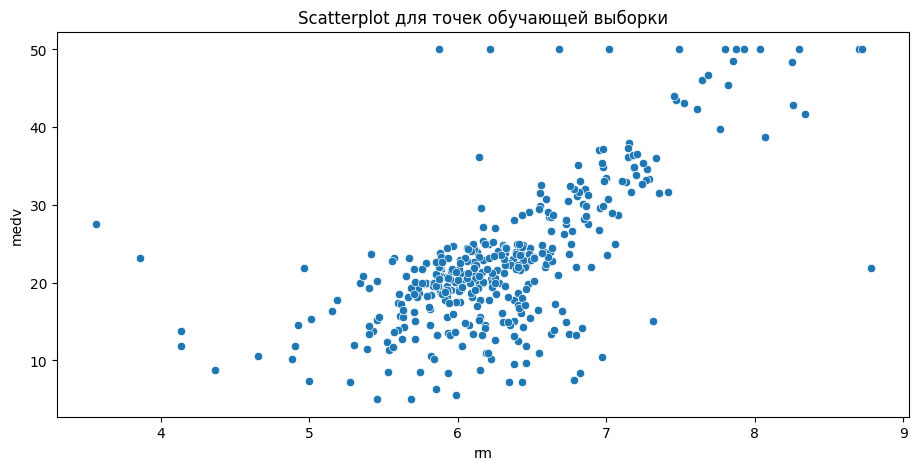

In [ ]:
sns.scatterplot(x=X_train.rm, y=y_train)
plt.title("Scatterplot для точек обучающей выборки");

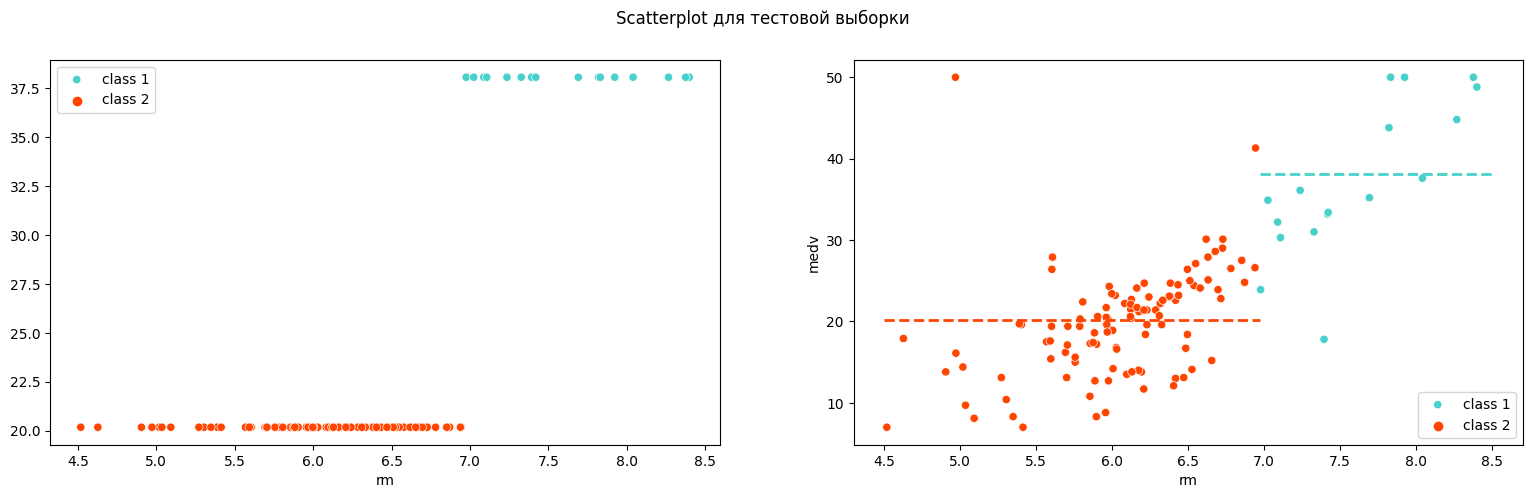

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(19,5))

#По 1 графику хорошо визуализируется наше дерево. Всем точкам, которые лежат правее определенного значения rm (6.971), присвоено значение около 38.051
#А всем точкам, которые лежат левее - 20.173
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test.rm, y=y_pred_dt, hue=y_pred_dt, palette=['orangered', 'mediumturquoise'])
plt.legend(['class 1', 'class 2'])

#Вспомним, что собственно классов у нас не было и посмотрим на графике 2, как на самом деле сработала наша модель.
#Для удобства пунктиром нарисуем, какие значения приобретут точки каждого цвета
#конечно красная точка сверху (в районе medv=50) даст большую ошибку, но в целом выглядит не так плохо
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test.rm, y=y_test, hue=y_pred_dt, palette=['orangered', 'mediumturquoise'])
plt.plot([4.5, 6.971], [20.173, 20.173], color='orangered', linestyle='dashed', linewidth=2)
plt.plot([6.971, 8.5], [38.051, 38.051], color='mediumturquoise', linestyle='dashed', linewidth=2)
plt.legend(['class 1', 'class 2'])

fig.suptitle('Scatterplot для тестовой выборки');

### Задание 2  (1 балл)


Продолжаем работать с датасетом boston

- С помощью `GridSearchCV` найдите оптимальные значения [`max_depth`, `min_samples_leaf`] используя кроссвалидацию с 5 фолдами
- Обучите модель с лучшими гиперпараметрами на всем тренировочном датасете
- Укажите значение `MAE` на тесте и значения гиперпараметров

In [ ]:
scoring = {"AUC": "roc_auc", "Accuracy": 'accuracy', 'f1_macro':'f1_macro'}

In [ ]:
opt = GridSearchCV(
    DecisionTreeRegressor(),
    {
        'min_samples_leaf': [1, 2, 3, 4],
        'max_depth': [1, 4, 8, 10, 15],
    },
    scoring='neg_mean_absolute_error', #Это как МАЕ, только отрицательный. То есть мы хотим его максимизировать
    cv=5
)

opt.fit(X_train, y_train) #обучила не тренировочном сете

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 4, 8, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 4]},
             scoring='neg_mean_absolute_error')

In [ ]:
opt.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
#оставляем только интересующие нас параметры
result_keys = ['param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']

In [ ]:
res_df = pd.DataFrame()
for key in result_keys:
        res_df[key] = opt.cv_results_[key]
res_df.head(2)

,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
0,1,1,-5.607477,0.299366,17
1,1,2,-5.607477,0.299366,17


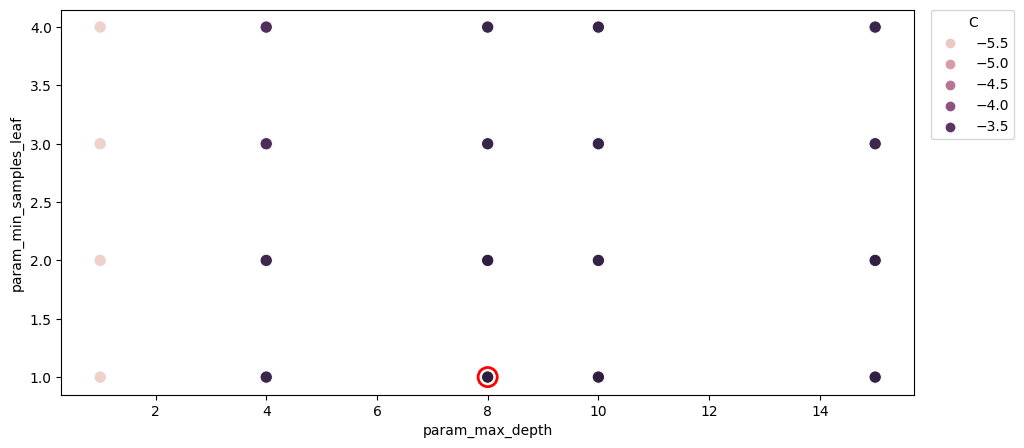

In [ ]:
#видим, что от минимального количества листиков ничего не меняется, и после max_depth=4 тоже изменений почти нет
sns.scatterplot(data=res_df, x='param_max_depth', y='param_min_samples_leaf', hue='mean_test_score', s=80)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='C')

#Обведем идеальный параметр
plt.scatter(x=opt.best_params_['max_depth'], y=opt.best_params_['min_samples_leaf'], s=190, facecolors='none', edgecolors='r', linewidths=2);

In [ ]:
#Вот такое было на трейне
print(opt.best_params_)
print(opt.best_score_)

{'max_depth': 8, 'min_samples_leaf': 1}
-3.0467310992796004


In [ ]:
#теперь посмотрим, что будет не тесте
y_pred = opt.predict(X_test)
mean_absolute_error(y_test, y_pred)

3.0984551450299485

In [ ]:
#Хорошее значение, видно, что модель хорошо кросс-валилась и не переобучилась (скор почти такой же, как на трейне)

### Задание 3  (1 балл)

Используйте `sklearn.ensemble.BaggingRegressor` для создания ансамбля

- какого значение MAE на тесте удалось достичь
- как можно объяснить изменение результата в сравнении с отдельным деревом

In [ ]:
from sklearn.ensemble import BaggingRegressor

model2 = BaggingRegressor(
    estimator=DecisionTreeRegressor(), #Просто чистая модель без заданных параметров
    n_estimators=20 #20 деревьев
)

model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
mean_absolute_error(y_test, y_pred)

2.2146062992125986

In [ ]:
#MAE уменьшился почти на 1, результат крутой.
"""
Что вообще произошло?
Бэггинг - когда берем, вместо 1 модели обучаем много моделей (из-за бутстрапа, у нас выборка больше),
а потом агрегируем результат, получая одну еще более хорошую модель. То есть улучшение результата ожидаемо, потому что по сути
мы обучили на бОльшей выборке, больше моделей, а потом усреднили прогнозы.
""";

# Часть 2. Ансамбли

В этой части будем решать задачу классификации на датасете [Thyroid Disease Data Set](https://archive.ics.uci.edu/ml/datasets/thyroid+disease)

In [ ]:
#Это я подправила, чтобы импортилось с моего гугл-диска и не приходилось каждый раз в коллаб файлик подгружать
#https://drive.google.com/file/d/192rJt7dEVTkuC1dyKEdd2R-nVMmtspE8/view?usp=sharing
!gdown 192rJt7dEVTkuC1dyKEdd2R-nVMmtspE8

df = pd.read_csv("/content/thyroid_disease.csv")
df.head(2)

Downloading...
From: https://drive.google.com/uc?id=192rJt7dEVTkuC1dyKEdd2R-nVMmtspE8
To: /content/thyroid_disease.csv
100% 296k/296k [00:00<00:00, 122MB/s]


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Class'])
X = df.drop('Class', axis=1)
X.head(2)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other


### Задание 1  (2 балла)

Начнем с предобработки данных

0. Удалите столбцы, которые не являются полезными (например, много пропущенных значений). Объясните свой выбор.
1. Разделите данные на тренировочную и тестовую части
2. Вы вероятно заметили, что имеются как категориальные так и численные признаки. С ними необходимо сделать следующее:
    -  Категориальные: Заполнить пропущенные значения и применить one-hot-encoding
    - Численные: Заполнить пропущенные значения

    
Используйте `ColumnTranformer` что бы задать общий "transformer" для всех столбцов в датасете. Он принимает на вход список кортежей

```
ColumnTransformer([
    ('name1', transform1, column_names1),
    ('name2', transform2, column_names2)
])
```

Обратите внимание на аргумент `remainder='passthrough'`. [Здесь](https://scikit-learn.org/stable/modules/compose.html#column-transformer) вы можете найти примеры использования `ColumnTranformer`.
    
Поскольку мы хотим применить 2 преобразования к категориальному признаку, очень удобно объединить их в `Pipeline`:

```
double_tranform = make_pipeline(
                        transform_1,
                        transform_2
                        )
```

P.S. Выберите ваш любимый способ заполнения пропущенных значений.

*Подсказка* Категориальный столбец обычно имеет `dtype = 'object'`. Это может помочь получить списки категориальных и числовых столбцов.


In [ ]:
df.Class.unique() #Видимо предсказывать будем, болен или не болен

array(['negative', 'sick'], dtype=object)

In [ ]:
#Удалите столбцы, которые не являются полезными (например, много пропущенных значений). Объясните свой выбор.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [ ]:
#Видим странный столбец TBG с 0 ненулевыми значениями, можем дропать
df.drop('TBG', inplace=True, axis=1)

In [ ]:
#Описание датасета почти нулевое, но выглядит так, что вот это ..._measured - это факт взятия измерений, так что TGB_measured тоже не понадобится
print(df.TBG_measured.nunique(), 'различных значений было в этом столбце')
df.drop('TBG_measured', inplace=True, axis=1)

1 различных значений было в этом столбце


In [ ]:
sum(df.nunique() < 2) #на всякий случай проверим, что нет столбцов со всеми одинаковыми значениями

0

In [ ]:
df = df.dropna(thresh=4) #у нас 6 значений (включая пол и не считая 1 человека с возрастом), которые могли быть пропущены. Дропнем кого-то, у кого пропущено почти все

In [ ]:
df.info() #На самом деле видим, что не дропнулось ничего. Хорошо.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [ ]:
#дропаем значения типа "взяли анализ" в реальном датасете, потому что мы проверяем, болен ли человек, а не живет ли он рядом с Инвитро
df.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured'], inplace=True, axis=1)

In [ ]:
# Появились подозрения, что 2 и 3 параметры одинаковые, но оказывается, что нет
sum(df.query_on_thyroxine != df.on_thyroxine)

500

In [ ]:
# И на всякий случай проверим одинаковость параметров Class и Sick, потому что они могут быть одинаковыми
print(df.Class.value_counts())
df.sick.value_counts()

negative    3541
sick         231
Name: Class, dtype: int64


f    3625
t     147
Name: sick, dtype: int64

In [ ]:
"""
0   age                        3771 non-null   float64 - релевантен, как и для всех задач про здоровье
 1   sex                        3622 non-null   object - может быть релевантен, тк речь о щитовидной железе, а гормоны у мужчин и женщин могут быть разные
 2   on_thyroxine               3772 non-null   object - это какой-то препарат, который принимают при проблемах с щитовидкой, релевантно
 3   query_on_thyroxine         3772 non-null   object - что-то про препарат из прошлой строчки, не понятно что, оставим
 4   on_antithyroid_medication  3772 non-null   object - опять какой-то препарат, который принимают при проблемах с щитовидкой
 5   sick                       3772 non-null   object - болен чем-то или не болен
 6   pregnant                   3772 non-null   object - беременность может быть фактором заболевания щитовидки и вообще разных других, оставляем
 7   thyroid_surgery            3772 non-null   object - была ли операция, оставляем
 8   I131_treatment             3772 non-null   object - была ли химиотерапия йодом, оставляем (если была, то у человека скорее всего был рак)
 9   query_hypothyroid          3772 non-null   object - гипотереоз (уставшая работать щитовидка)
 10  query_hyperthyroid         3772 non-null   object - гипертереоз (гиперактивная щитовидка)
 11  lithium                    3772 non-null   object - литий угнетает щитовидку, так что релевантно
 12  goitre                     3772 non-null   object - зоб (не гуглите, страшно), это когда щитовидка увеличена, релевантно
 13  tumor                      3772 non-null   object - опухоль
 14  hypopituitary              3772 non-null   object - недостаток активности гипофиза, релевантно, потому что он тоже вырабатывает гормоны, как и щитовидка
 15  psych                      3772 non-null   object - есть ли у человека проблемы с психикой? Было бы интересно увидеть, что релевантно
 16  TSH                        3403 non-null   float64 - гормон, релевантно
 17  T3                         3003 non-null   float64 - гормон, релевантно
 18  TT4                        3541 non-null   float64 - гормон, релевантно
 19  T4U                        3385 non-null   float64 - что-то про тироксин, релевантно
 20  FTI                        3387 non-null   float64 - индекс тироксина, релевантно
 21  referral_source            3772 non-null   object - наверное, когда-то может быть релевантно, кто направил человека лечиться
 22  Class                      3772 non-null   object - предсказываем это
""";

In [ ]:
# Прежде чем заполнять средними, посмотрим, чтобы случайно не заполнить и не сделать человека больным заранее
print(df['TSH'].mean()) #TSH normal values are 0.5 to 5.0 mIU/L
print(df['T3'].mean()) #A normal Total T3 level in adults ranges from 80-220 ng/dL or 2.0 to 7.0 picomoles per liter
print(df['T4U'].mean()) # A typical normal range is 0.9 to 2.3 nanograms per deciliter (ng/dL), or 12 to 30 picomoles per liter (pmol/L).
print(df['TT4'].mean()) # A normal Total T4 level in adults ranges from 5.0 to 12.0μg/dL or 0.9 to 2.3 nanograms per deciliter (ng/dL)
print(df['FTI'].mean()) # Reference range for T-uptake ratio is 0.7–1.2 and for FTI is 6–11.00 μg/dL.

#Как видим, все показатели входят в норму кроме TSH, а последние 2 измеряются непонятно в чем, но если умножить на 100, то примерно входит в range

5.086766088745225
2.013499833499833
0.9949997045790251
108.31934481784806
110.4696486566283


In [ ]:
#заполним средними, потому что пока неизвестно, какие вообще фичи будут важными
df['TSH'] = df['TSH'].fillna(5) #заполним верхней границей нормы

In [ ]:
#Разделите данные на тренировочную и тестовую части
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [ ]:
#Вы вероятно заметили, что имеются как категориальные так и численные признаки. С ними необходимо сделать следующее:
#Категориальные: Заполнить пропущенные значения и применить one-hot-encoding
#Численные: Заполнить пропущенные значения - уже

df.sex = df['sex'].fillna('U') #добавляем неопределенный пол

In [ ]:
num_col_names = ['T3', 'T4U', 'TT4', 'FTI', 'age']
cat_col_names = X_train.select_dtypes(include='object').columns #выбрали только object и колонки
cat_col_names[2:4]

Index(['query_on_thyroxine', 'on_antithyroid_medication'], dtype='object')

In [ ]:
def fillna_mean(x):
    return x.fillna(x.mean())

num_transformer = FunctionTransformer(fillna_mean)

ct = ColumnTransformer([
    ('categories', OneHotEncoder(dtype='int'), cat_col_names),
    ('nulls', num_transformer, num_col_names)
], remainder='passthrough')


X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

y_train = pd.get_dummies(y_train, drop_first=True)
y_test = pd.get_dummies(y_test, drop_first=True)

In [ ]:
X_train

array([[  1.        ,   0.        ,   0.        , ..., 117.        ,
         56.        ,   0.4       ],
       [  1.        ,   0.        ,   0.        , ..., 112.        ,
         32.        ,   0.6       ],
       [  1.        ,   0.        ,   0.        , ..., 105.        ,
         31.        ,   2.2       ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,  60.        ,
         78.        ,  25.        ],
       [  0.        ,   1.        ,   0.        , ...,  98.        ,
         19.        ,   0.2       ],
       [  1.        ,   0.        ,   0.        , ..., 122.        ,
         33.        ,   5.08676609]])

### Задание 2  (1.5 балл)

Обучите и сравните 5 разных моделей из sklearn: Gradient Boosting, Random Forest, Decision Tree, SVM, Logitics Regression
    
* Выберите одну метрику классификации и обоснуйте свой выбор.
* Сравните модели используя данную метрику на кроссвалидации. Не забудьте выбрать верную стратегию кроссвалидации с учетом баланса классов. (подробнее о CV стратегиях [тут](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold))
* Какая модель оказалась лучшей. Какие модели переобучались или недообучались?

In [ ]:
#это я взяла у себя самой https://github.com/Whoami666/HSE_Lab/blob/main/clean_models/SMOTE_schiz_models_logreg.ipynb
#функция удобно делает кроссвал и сразу считает скоры
#Я ее модифицировала, чтобы она еще и dict возвращала

def calculate_scores(model, givenx, giveny, xtest):
  res_dict = {}
  res_dict['name'] = str(model)
  kf = KFold(n_splits=10)
  crossval_f1 = cross_val_score(model, givenx, giveny, scoring='f1_macro', cv = kf, verbose=False)
  mean_score = crossval_f1.mean()
  std_score = crossval_f1.std()
  res_dict['f1_weighted'] = mean_score
  res_dict['f1_weighted_std'] = std_score
  print('f1_weighted', mean_score, '±', std_score)

  crossval_accuracy = cross_val_score(model, givenx, giveny, scoring='accuracy', cv = kf, verbose=False)
  mean_score = crossval_accuracy.mean()
  std_score = crossval_accuracy.std()
  res_dict['accuracy'] = mean_score
  res_dict['accuracy_std'] = std_score
  print('accuracy', mean_score, '±', std_score)

  crossval_recall = cross_val_score(model, givenx, giveny, scoring='recall_macro', cv = kf, verbose=False)
  mean_score = crossval_recall.mean()
  std_score = crossval_recall.std()
  res_dict['recall'] = mean_score
  res_dict['recall_std'] = std_score
  print('recall', mean_score, '±', std_score)

  return(res_dict)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression(max_iter=5000)
logre_dict = calculate_scores(logreg, X_train, y_train, X_test)

f1_weighted 0.8347342998941046 ± 0.07336289403222063
accuracy 0.968638649565319 ± 0.013999414179790039
recall 0.8006749950428418 ± 0.08667578900995203


In [ ]:
svc = SVC()
svc_dict = calculate_scores(svc, X_train, y_train, X_test)

f1_weighted 0.48435574727835967 ± 0.004551969804558786
accuracy 0.9394721453354645 ± 0.01706221037374147
recall 0.5 ± 0.0


In [ ]:
tree = DecisionTreeClassifier(random_state=13)
tree_dict = calculate_scores(tree, X_train, y_train, X_test)

f1_weighted 0.9269433107892431 ± 0.04512710039828153
accuracy 0.9854216209894352 ± 0.005932157541216546
recall 0.9242505347045025 ± 0.06002136122770576


In [ ]:
forest = RandomForestClassifier(random_state=13)
forest_dict = calculate_scores(forest, X_train, y_train, X_test)

f1_weighted 0.9050323193117853 ± 0.05568999460800538
accuracy 0.9823301235819267 ± 0.006234272705114887
recall 0.877677805002409 ± 0.06730177579372347


In [ ]:
boost = GradientBoostingClassifier(random_state=13)
boost_dict = calculate_scores(boost, X_train, y_train, X_test)

f1_weighted 0.9344692222996196 ± 0.04055741809347881
accuracy 0.9871895832521149 ± 0.005003174646719528
recall 0.9228916465581125 ± 0.05844564823911204


In [ ]:
results = pd.DataFrame.from_dict([forest_dict, boost_dict,tree_dict,svc_dict,logre_dict])
results

,name,f1_weighted,f1_weighted_std,accuracy,accuracy_std,recall,recall_std
0,RandomForestClassifier(random_state=13),0.905032,0.055690,0.982330,0.006234,0.877678,0.067302
1,GradientBoostingClassifier(random_state=13),0.934469,0.040557,0.987190,0.005003,0.922892,0.058446
2,DecisionTreeClassifier(random_state=13),0.926943,0.045127,0.985422,0.005932,0.924251,0.060021
3,SVC(),0.484356,0.004552,0.939472,0.017062,0.500000,0.000000
4,LogisticRegression(max_iter=5000),0.834734,0.073363,0.968639,0.013999,0.800675,0.086676


In [ ]:
"""
На самом деле даже из таблички выше видно, что accuracy - фиговый показатель, особенно в данном случае, тк recall - 0.5
Я буду смотреть на f1 weighted, потому что он не только учитывает и пресижн, и рекол, но еще и учитывает дисбаланс классов
"""

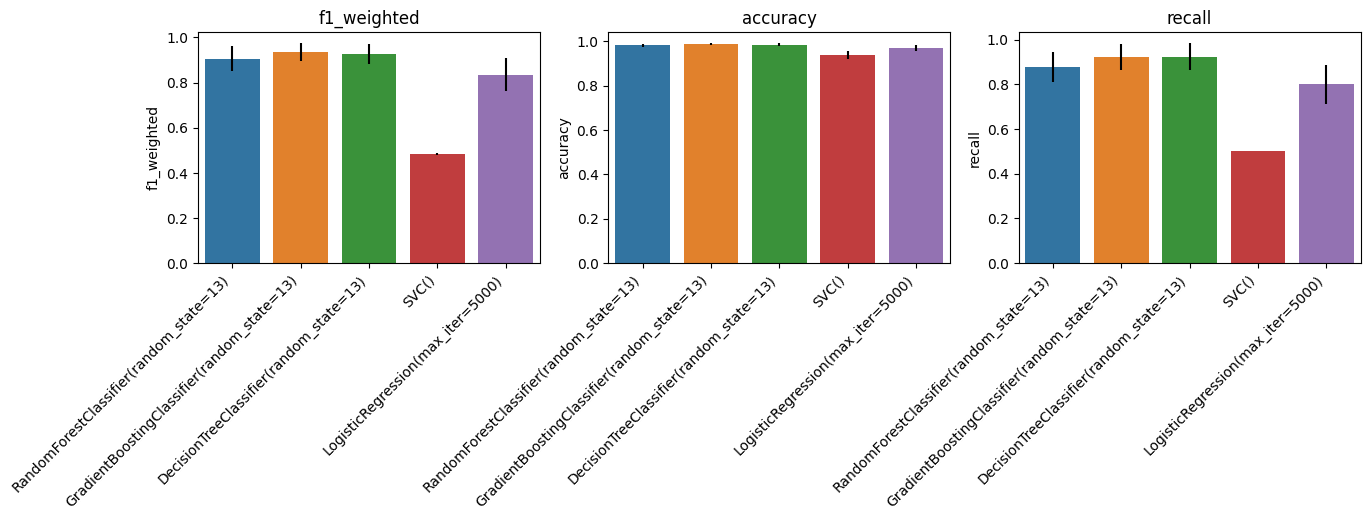

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.barplot(x = "name", y = "f1_weighted",
            data = results, yerr=results["f1_weighted_std"]).set(title = 'f1_weighted', xlabel="")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x = "name", y = "accuracy",
            data = results, yerr=results["accuracy_std"]).set(title = 'accuracy', xlabel="")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x = "name", y = "recall",
            data = results, yerr=results["recall_std"]).set(title = 'recall', xlabel="")
plt.xticks(rotation=45, ha='right');

In [ ]:
"""
Простите за дизайн, я торопилась
Смотрим на f1_weighted и видим, что лучше всего перформит желтая модель - Бустинг.
Хуже всего - SVC()
При этом заметим, что accuracy SVC почти не отличается от accuracy остальных, что подчеркивает, что параметр такой себе
""";

### Задание 3  (1 балл)



Вам нужно обучить одну из трех популярных реализаций бустинга (xgboost, lightgbm, catboost). Подберите гиперпараметры (количество деревьев, скорость обучения, глубина) на кроссвалидации и сравните с методами из предыдущей задачи.


Чтобы получить реализацию, которую вы должны использовать, запустите ячейку ниже и введите свое имя (например, если вы введете Андрей, вы увидите, что пользователь с таким именем должен реализовать xgboost).

In [ ]:
def assign_method():
    name = input()
    methods = ['xgboost', 'lightgbm', 'catboost']
    idx = sum([ord(x) for x in list(name)]) % 3
    print('Реализуйте', methods[idx])

assign_method()

Марина
Реализуйте catboost


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
#Подберем параметры
opt = GridSearchCV(
    CatBoostClassifier(),
    {
        'depth': [4,6,9,10],
        'learning_rate' : [0.01, 0.03,0.04],
        'iterations'    : [10,50,90,110],
    },
    scoring='f1_weighted',
    cv=3
)

In [ ]:
opt.fit(X_train, y_train, logging_level='Silent')
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best_params: %s" % opt.best_params_, '\n')

val. score: 0.9868337563929014
test score: 0.987823306811702
best_params: {'depth': 6, 'iterations': 110, 'learning_rate': 0.04} 



In [ ]:
y_pred = opt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [ ]:
catboost_params = pd.DataFrame([['Catboost^-^',accuracy,f1_weighted,recall]], columns=['name','accuracy','f1_weighted','recall'])
catboost_params

,name,accuracy,f1_weighted,recall
0,Catboost^-^,0.988072,0.987823,0.988072


In [ ]:
res_plus_cat = pd.concat([results, catboost_params])
res_plus_cat.fillna(0, inplace=True)
res_plus_cat

,name,f1_weighted,f1_weighted_std,accuracy,accuracy_std,recall,recall_std
0,RandomForestClassifier(random_state=13),0.905032,0.055690,0.982330,0.006234,0.877678,0.067302
1,GradientBoostingClassifier(random_state=13),0.934469,0.040557,0.987190,0.005003,0.922892,0.058446
2,DecisionTreeClassifier(random_state=13),0.926943,0.045127,0.985422,0.005932,0.924251,0.060021
3,SVC(),0.484356,0.004552,0.939472,0.017062,0.500000,0.000000
4,LogisticRegression(max_iter=5000),0.834734,0.073363,0.968639,0.013999,0.800675,0.086676
0,Catboost^-^,0.987823,0.000000,0.988072,0.000000,0.988072,0.000000


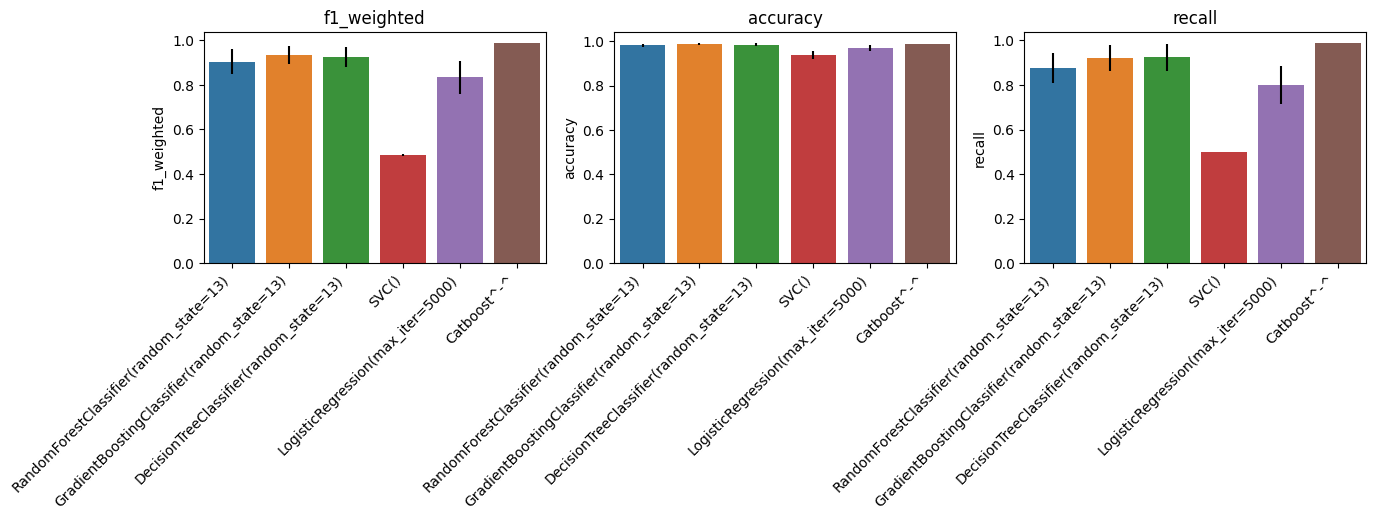

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.barplot(x = "name", y = "f1_weighted",
            data = res_plus_cat, yerr=res_plus_cat["f1_weighted_std"]).set(title = 'f1_weighted', xlabel="")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x = "name", y = "accuracy",
            data = res_plus_cat, yerr=res_plus_cat["accuracy_std"]).set(title = 'accuracy', xlabel="")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x = "name", y = "recall",
            data = res_plus_cat, yerr=res_plus_cat["recall_std"]).set(title = 'recall', xlabel="")
plt.xticks(rotation=45, ha='right');

In [ ]:
"""
Я считала скоры для катбуста без Кроссвала (слишком долго считал), поэтому для него у меня нет std

Тем не менее можно видеть, что ни у одной модели не получились такие крутые скоры f1_weighted, как у катбуста (верх черной линии - максимальный параметр, а у нас ни DTC, ни GBC не
достают до коричневого - катбуста)

На самом деле это просто может быть связано с тем, что только для катбуста был подбор гиперпараметров
""";

### Задание 4  (2.5 балла)

Обучим еще несколько ансамблей:

* Бэггинг над деревьями решений
* Бэггинг над градиентным бустингом (с большим колличеством деревьев, >100)
* [VotingСlassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier)
* [StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) c LogisticRegression в качестве финальной модели
* [StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) c GradeintBoosting в качестве финальной модели

Если в задании не указано иное, не стесняйтесь настраивать/выбирать гиперпараметры и базовые модели.

Ответьте на вопросы:
* Какая модель показала лучший скор?
* Снижает ли бэггинг переобучение в случае градиентного бустинка с большим колличством деревьев?
* В чем разница между VotingСlassifier и StackingClassifier?



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
#Бэггинг над деревьями решений
bag_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bag_tree.fit(X_train, y_train)

y_pred = bag_tree.predict(X_test)
print(classification_report(y_test,y_pred))

bag_tree_dict = classification_report(y_test,y_pred,output_dict=True)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1415
           1       0.94      0.85      0.89        94

    accuracy                           0.99      1509
   macro avg       0.97      0.92      0.94      1509
weighted avg       0.99      0.99      0.99      1509



In [ ]:
#Бэггинг над градиентным бустингом (с большим колличеством деревьев, >100)
bcc = BaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators=100), n_estimators=10)
bcc.fit(X_train, y_train)

y_pred = bcc.predict(X_test)
bcc_dict = classification_report(y_test,y_pred,output_dict=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1415
           1       0.96      0.85      0.90        94

    accuracy                           0.99      1509
   macro avg       0.98      0.92      0.95      1509
weighted avg       0.99      0.99      0.99      1509



In [ ]:
#VotingСlassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
galasuem = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard') #hard голосование - это выбор большинства =)

voting = BaggingClassifier(base_estimator=galasuem, n_estimators=10)
voting.fit(X_train, y_train)

y_pred = voting.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1415
           1       0.85      0.78      0.81        94

    accuracy                           0.98      1509
   macro avg       0.92      0.88      0.90      1509
weighted avg       0.98      0.98      0.98      1509



In [ ]:
#Что-то голосование плохо сработало, но я верю в демократию и попробую еще "мягкое"
galasuem2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

voting_soft = BaggingClassifier(base_estimator=galasuem, n_estimators=10)
voting_soft.fit(X_train, y_train)

y_pred = voting_soft.predict(X_test)
print(classification_report(y_test,y_pred)) #Ладно, стало только хуже

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1415
           1       0.82      0.74      0.78        94

    accuracy                           0.97      1509
   macro avg       0.90      0.87      0.88      1509
weighted avg       0.97      0.97      0.97      1509



In [ ]:
#Теперь я поняла, что не надо было накладывать бэггинг, убираю бэггинг
galasuem2.fit(X_train, y_train)
y_pred = galasuem2.predict(X_test)
print(classification_report(y_test,y_pred)) #Это для софт голосования

galasuem2_dict = classification_report(y_test,y_pred,output_dict=True)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1415
           1       0.77      0.84      0.80        94

    accuracy                           0.97      1509
   macro avg       0.88      0.91      0.89      1509
weighted avg       0.98      0.97      0.97      1509



In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42))) ]
stacklog = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression())

stacklog.fit(X_train, y_train)
y_pred = stacklog.predict(X_test)
print(classification_report(y_test,y_pred))

stacklog_dict = classification_report(y_test,y_pred,output_dict=True)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1415
           1       0.90      0.78      0.83        94

    accuracy                           0.98      1509
   macro avg       0.94      0.89      0.91      1509
weighted avg       0.98      0.98      0.98      1509



In [ ]:
stack_boost = StackingClassifier(
     estimators=estimators, final_estimator=GradientBoostingClassifier())

stack_boost.fit(X_train, y_train)
y_pred = stack_boost.predict(X_test)
print(classification_report(y_test,y_pred))

stack_boost_dict = classification_report(y_test,y_pred,output_dict=True)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1415
           1       0.89      0.79      0.84        94

    accuracy                           0.98      1509
   macro avg       0.94      0.89      0.91      1509
weighted avg       0.98      0.98      0.98      1509



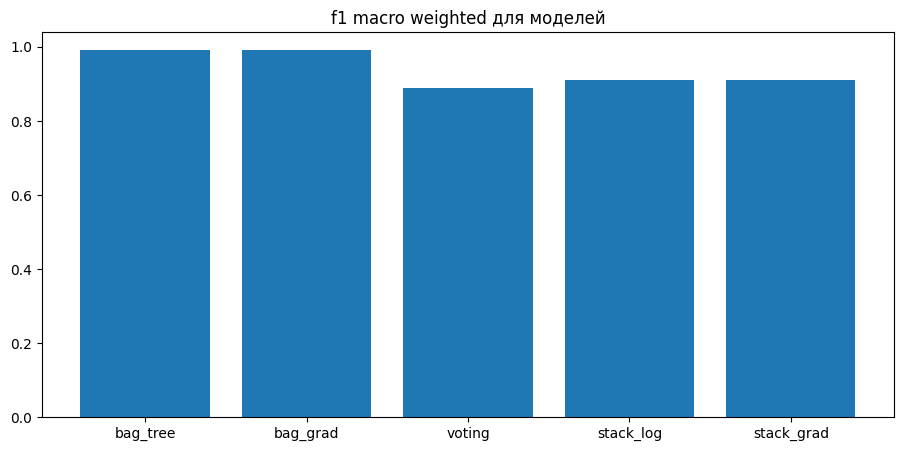

In [ ]:
names = ['bag_tree', 'bag_grad', 'voting', 'stack_log', 'stack_grad']
f1 = [0.99, 0.99, 0.89, 0.91, 0.91]
plt.bar(names, f1)
plt.title('f1 macro weighted для моделей');

In [ ]:
"""
лучшие взвешенные макро f1 у bag_tree и у bag_grad (Бэггинг над деревьями решений, Бэггинг над градиентным бустингом (с большим колличеством деревьев, >100))
Хуже всего показало себя голосование без бэгинга
""";

Укажите скор лучшей модели

In [ ]:
#вот такой скор

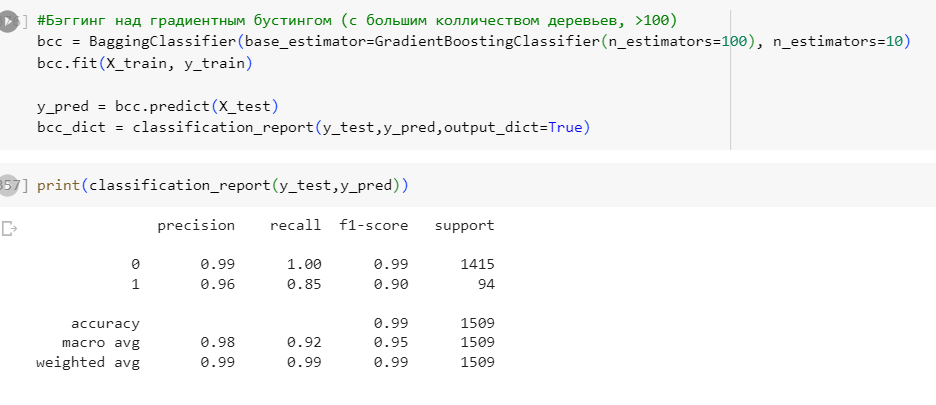

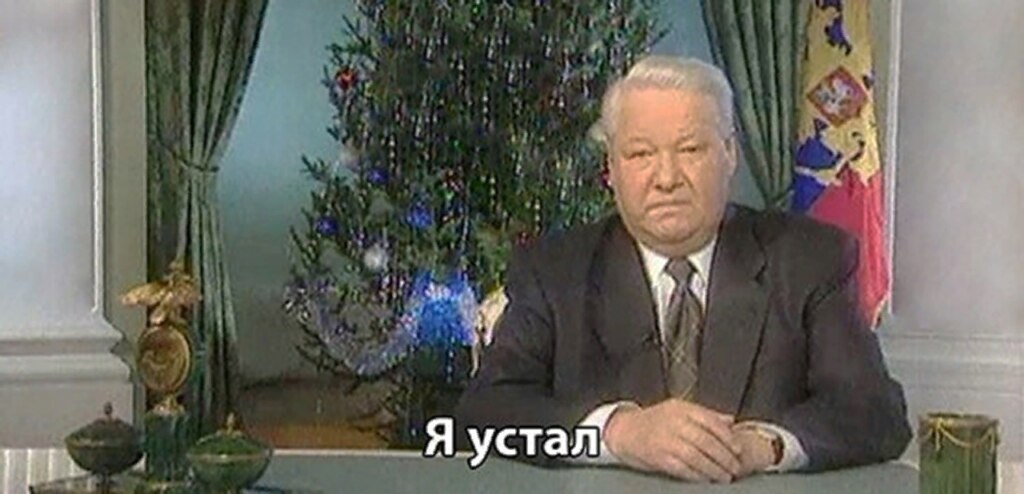